In [4]:
!pip install graphviz
!pip install scikit-plot


   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 261.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Core python library
import os
import gc
import pandas as pd
import numpy as np
from numpy import median
import statsmodels.api as sm
pd.set_option('display.max_columns', 500)

# ignore the warning message
import warnings
warnings.filterwarnings('ignore')

# visualize related
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from IPython.display import display, HTML
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

# check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor  

# Machine learning related
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score, precision_recall_curve, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

# Visualize the tree model
import graphviz
import scikitplot as skplt

In [9]:
import os

print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir())


Current working directory: C:\Users\user
Files in current directory: ['.dbshell', '.idea', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.mongorc.js', '.ms-ad', '.streamlit', '.vscode', '011223.ipynb', '1.7.1', '191123.ipynb', '3D Objects', 'Airbnb.ipynb', 'Airbnb_data.csv', 'Air_bnb.csv', 'app.py', 'AppData', 'Application Data', 'Bankloan.ipynb', 'Bizcard.ipynb', 'block_no.csv', 'classification.pkl', 'combined.csv', 'Contacts', 'Cookies', 'copper modelling.ipynb', 'CRIME.ipynb', 'DAY 1.ipynb', 'Desktop', 'Documents', 'Downloads', 'dt.pkl', 'Favorites', 'flat_coordinates.csv', 'horse 1.ipynb', 'horse 2.ipynb', 'horse 3.ipynb', 'horse 4.ipynb', 'horse 5.ipynb', 'horse 6.ipynb', 'horse 7.ipynb', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'machine learning.ipynb', 'map_with_geojson.html', 'Microsoft', 'module 14.ipynb', 'module 8.ipynb', 'module 9.ipynb', 'module10.ipynb', 'module12.ipynb', 'module5.ipynb', 'moule 6.ipynb', 'Music', 'My Documents', 'NetHood', 'NLP

In [12]:
import os
import sys

SEED = 1234
PATH = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()
os.chdir(PATH)  # Ensure we are in the desired working path

# Add the current working directory to the system path
sys.path.append(PATH)

# Now import the module
try:
    import myUtilityFunction
    print("myUtilityFunction module imported successfully")
except ModuleNotFoundError as e:
    print(f"ModuleNotFoundError: {e}")

# If you need to use specific functions or classes from the module, you can do so like this:
# from myUtilityFunction import some_function
# result = myUtilityFunction.some_function()


ModuleNotFoundError: No module named 'myUtilityFunction'


In [53]:
data_df = pd.read_csv(r"C:\Users\user\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data_df 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [54]:
display(data_df.head(5))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [55]:
print(data_df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [56]:
one_uniq = dict()
for col in data_df.columns:
    if len(data_df[col].unique()) == 1:
        one_uniq.update({col: data_df[col].unique().tolist()})
        
print('The name of column(s) with single value: %s' % one_uniq)

The name of column(s) with single value: {'EmployeeCount': [1], 'Over18': ['Y'], 'StandardHours': [80]}


In [57]:
data_df.drop(one_uniq.keys(), axis=1, inplace=True)

In [58]:
data_df.drop('EmployeeNumber', axis=1, inplace=True)

In [59]:
education_map = {1: 'Below College', 2: 'College',
                 3: 'Bachelor', 4: 'Master', 5: 'Phd'}
envir_sat_map = {1: 'Low', 2: 'Medium',
                 3: 'High', 4: 'Very High'}
job_inv_map = {1: 'Low', 2: 'Medium',
               3: 'High', 4: 'Very High'}
job_sat_map = {1: 'Low', 2: 'Medium',
               3: 'High', 4: 'Very High'}
perf_rate_map = {1: 'Low', 2: 'Good',
                 3: 'Excellent', 4: 'Outstanding'}
relation_sat_map = {1: 'Low', 2: 'Medium',
                    3: 'High', 4: 'Very High'}
work_life_map = {1: 'Bad', 2: 'Good',
                 3: 'Better', 4: 'Best'}

data_df['Education'] = data_df['Education'].apply(lambda x: education_map[x])
data_df['EnvironmentSatisfaction'] = \
    data_df['EnvironmentSatisfaction'].apply(lambda x: envir_sat_map[x])
data_df['JobInvolvement'] = data_df['JobInvolvement'].apply(lambda x: job_inv_map[x])
data_df['JobSatisfaction'] = \
    data_df['JobSatisfaction'].apply(lambda x: job_sat_map[x])
data_df['PerformanceRating'] = data_df['PerformanceRating'].apply(lambda x: perf_rate_map[x])
data_df['RelationshipSatisfaction'] = \
    data_df['RelationshipSatisfaction'].apply(lambda x: relation_sat_map[x])
data_df['WorkLifeBalance'] = data_df['WorkLifeBalance'].apply(lambda x: work_life_map[x])

display(data_df.head(5))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2


In [60]:
le_10_val_col = []
mt_10_val_col = []
obj_val_col = []
for col in data_df.columns:
    if (len(data_df[col].unique()) <= 10) & (data_df[col].dtypes == 'int64'):
        le_10_val_col.append(col)
    elif (len(data_df[col].unique()) > 10) & (data_df[col].dtypes == 'int64'):
        mt_10_val_col.append(col)
    elif data_df[col].dtypes == 'O':
        obj_val_col.append(col)

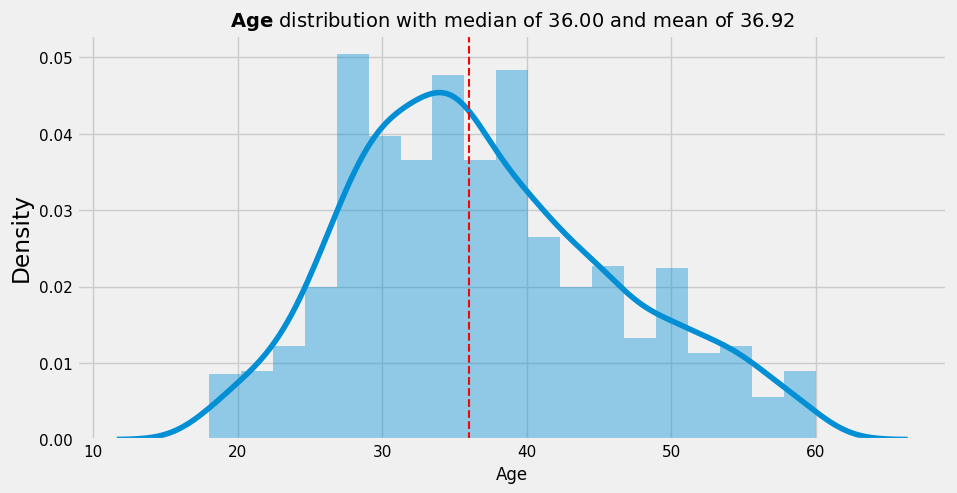

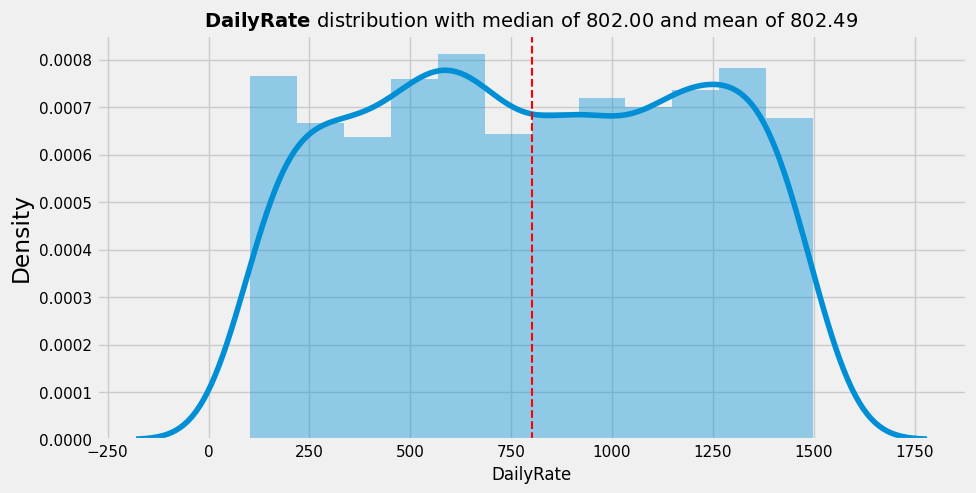

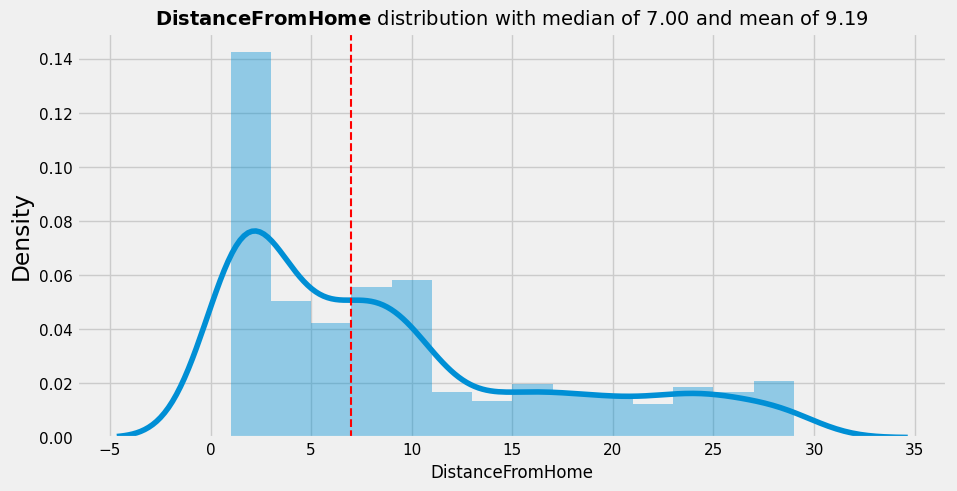

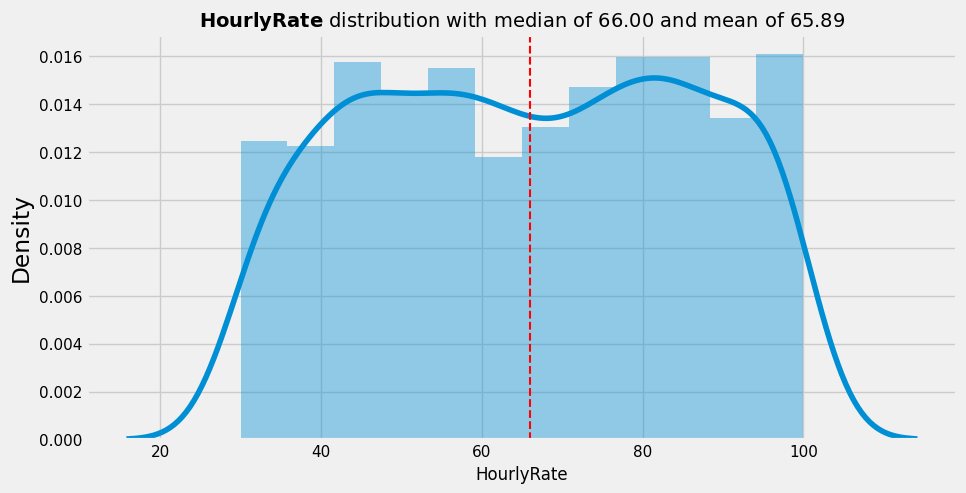

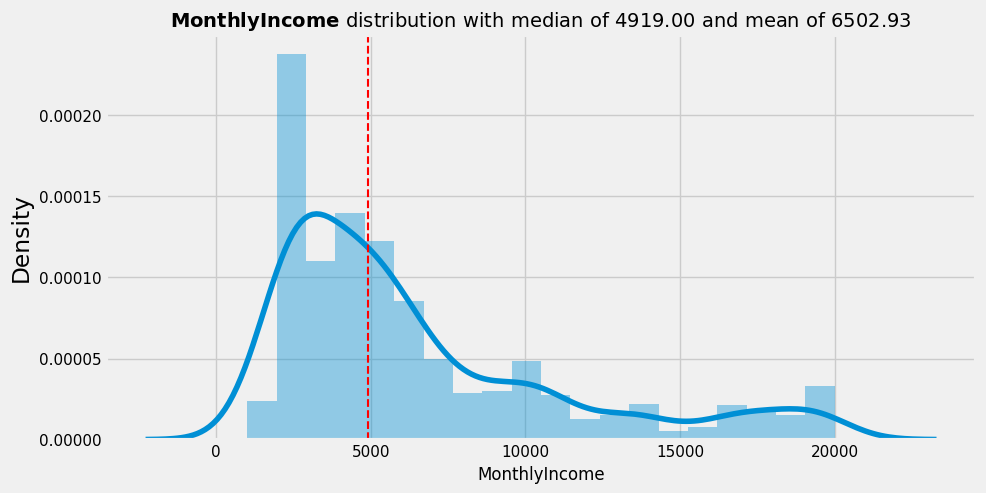

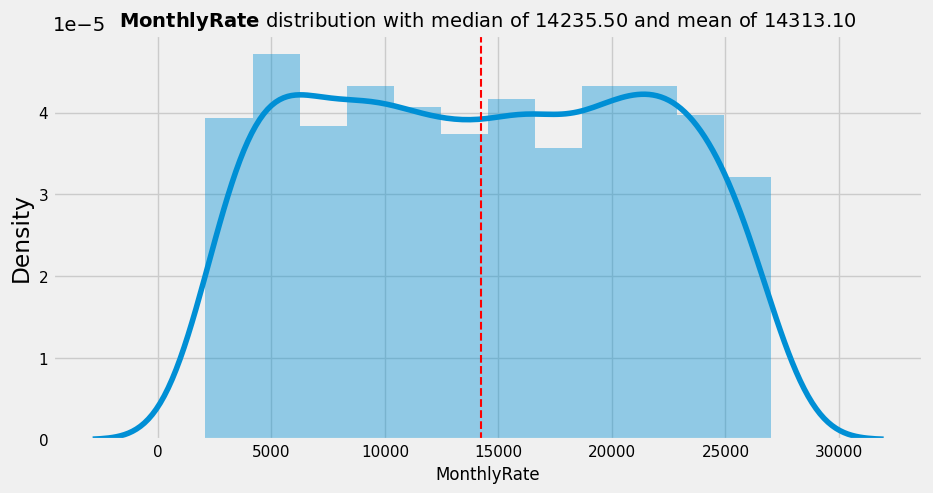

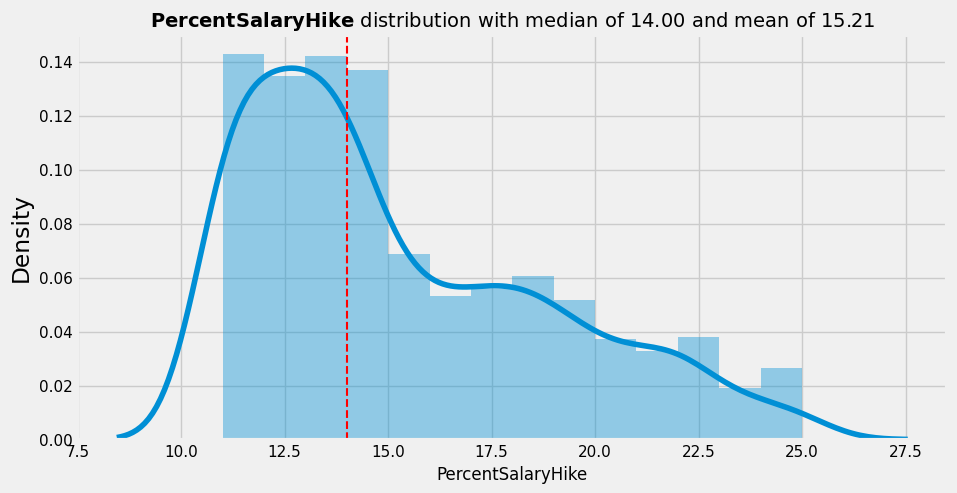

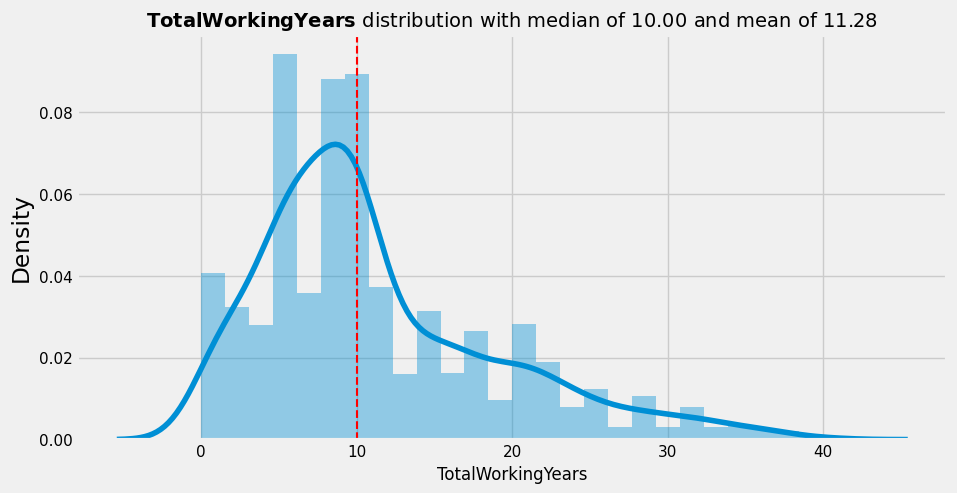

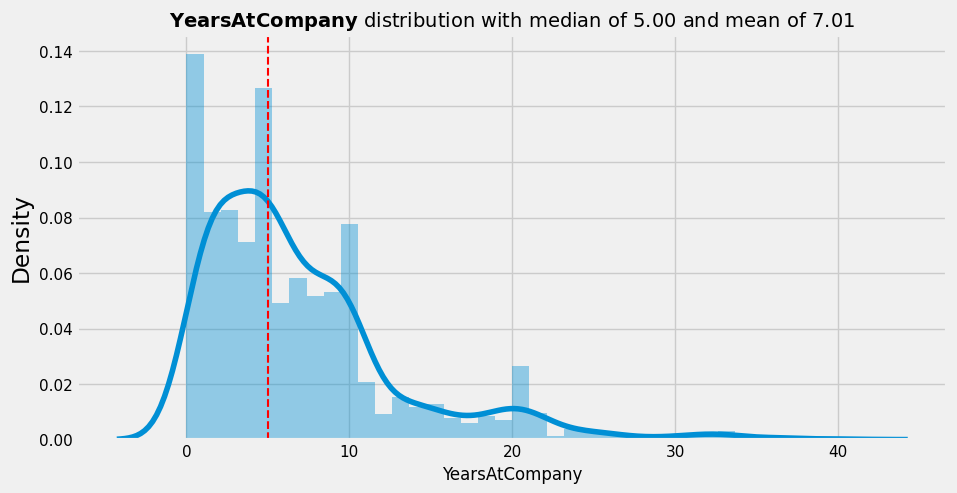

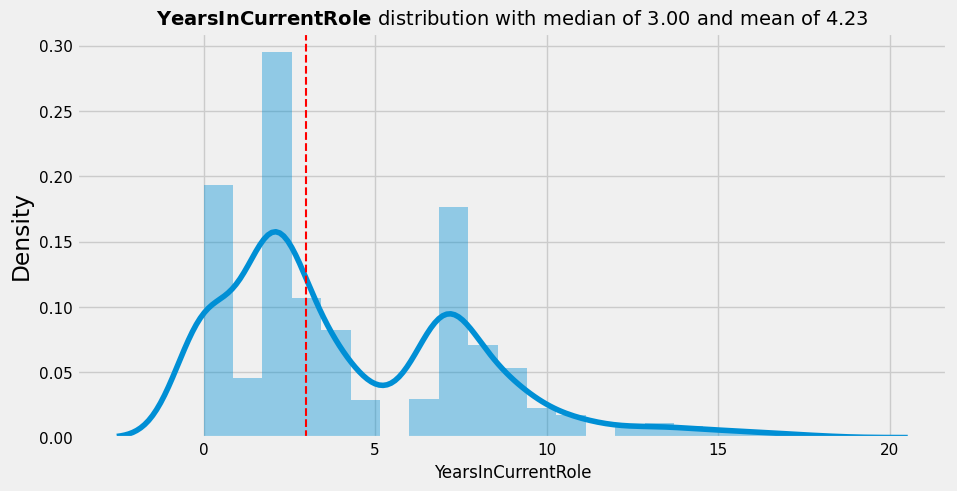

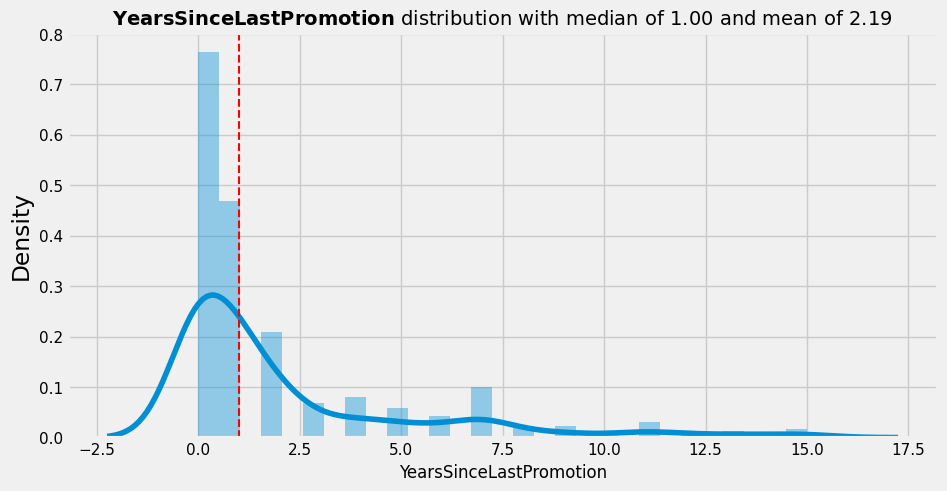

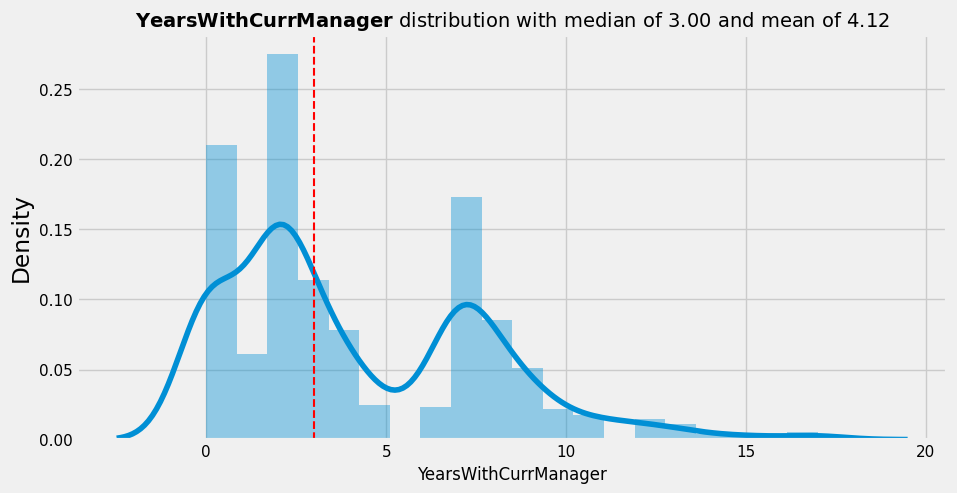

In [61]:
for i in mt_10_val_col:
    plt.figure(figsize=(10, 5))
    sns.distplot(data_df.loc[:, i], kde=True)
    plt.title(r'$\bf{%s}$ distribution with median of %.2f and mean of %.2f' % \
              (i, median(data_df.loc[:, i]), data_df.loc[:, i].mean()),
              size=14)
    plt.xlabel(i, fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.axvline(median(data_df.loc[:, i]), 0, linestyle='--', 
                linewidth=1.5, color='r')
    plt.show()

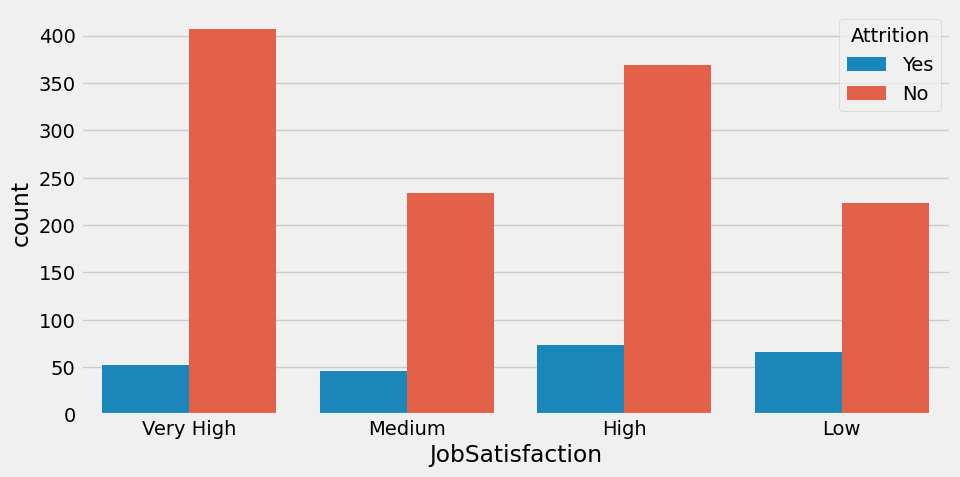

Attrition,No,Yes
JobSatisfaction,,
Low,0.771626,0.228374
Medium,0.835714,0.164286
High,0.834842,0.165158
Very High,0.886710,0.113290


In [62]:
plt.figure(figsize=(10, 5))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data_df)
plt.show();
pd.crosstab(data_df.JobSatisfaction, data_df.Attrition, 
            normalize='index').reindex(index=['Low', 'Medium', 'High', 'Very High'])

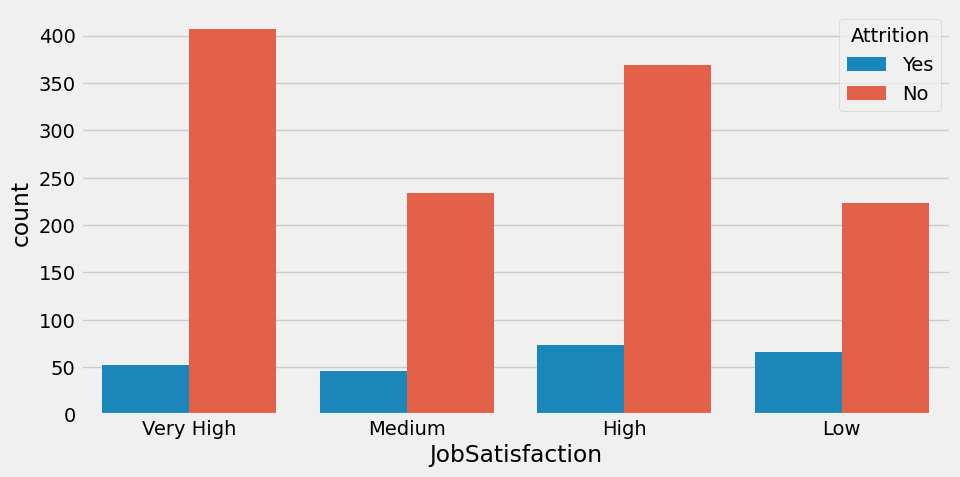

Attrition,No,Yes
JobSatisfaction,,
Low,0.771626,0.228374
Medium,0.835714,0.164286
High,0.834842,0.165158
Very High,0.886710,0.113290


In [63]:
plt.figure(figsize=(10, 5))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data_df)
plt.show();
pd.crosstab(data_df.JobSatisfaction, data_df.Attrition, 
            normalize='index').reindex(index=['Low', 'Medium', 'High', 'Very High'])

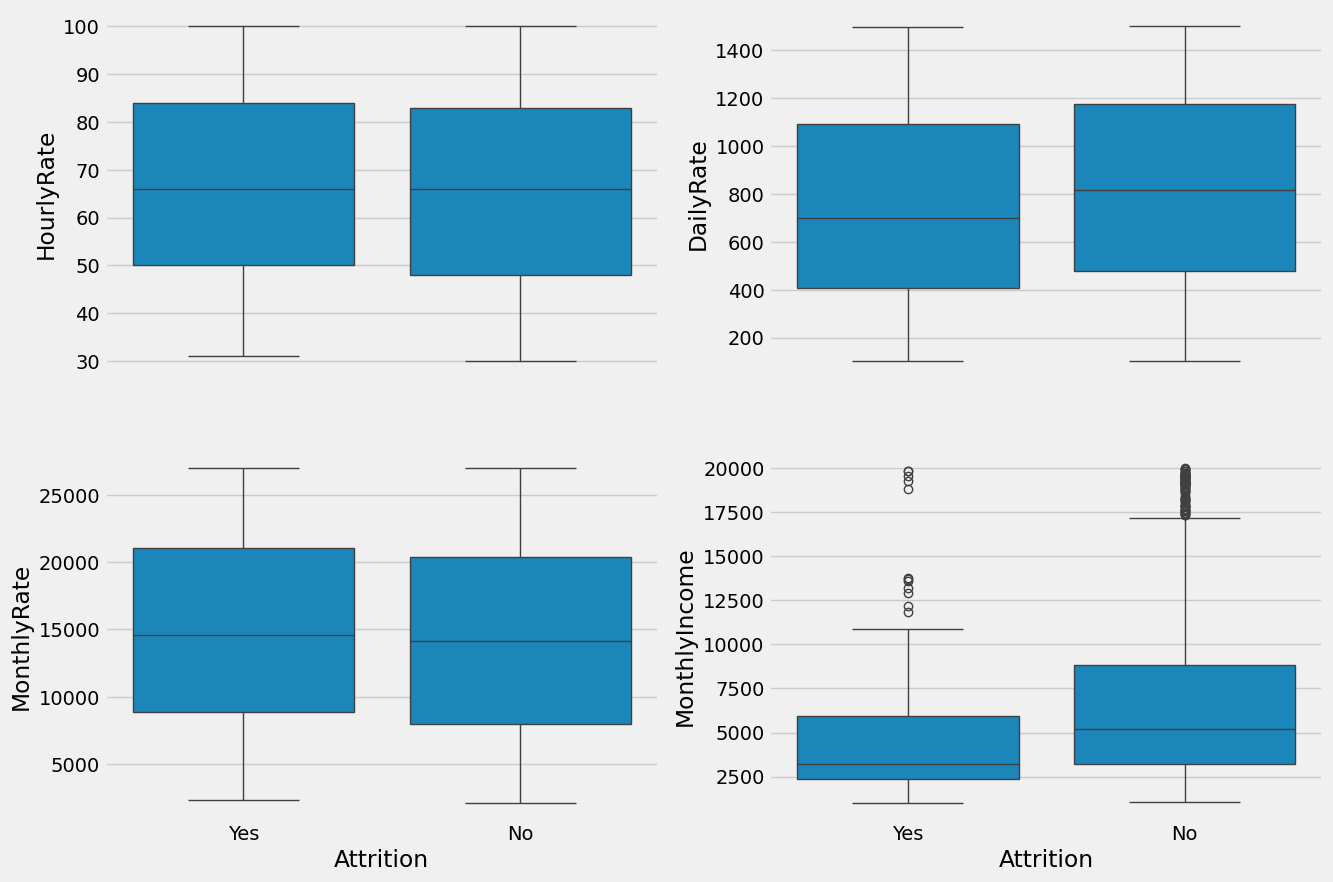

In [64]:
f, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
sns.boxplot(x='Attrition', y='HourlyRate', data=data_df, ax=axes[0][0])
sns.boxplot(x='Attrition', y='DailyRate', data=data_df, ax=axes[0][1])
sns.boxplot(x='Attrition', y='MonthlyRate',data=data_df, ax=axes[1][0])
sns.boxplot(x='Attrition', y='MonthlyIncome',data=data_df, ax=axes[1][1])
plt.show();

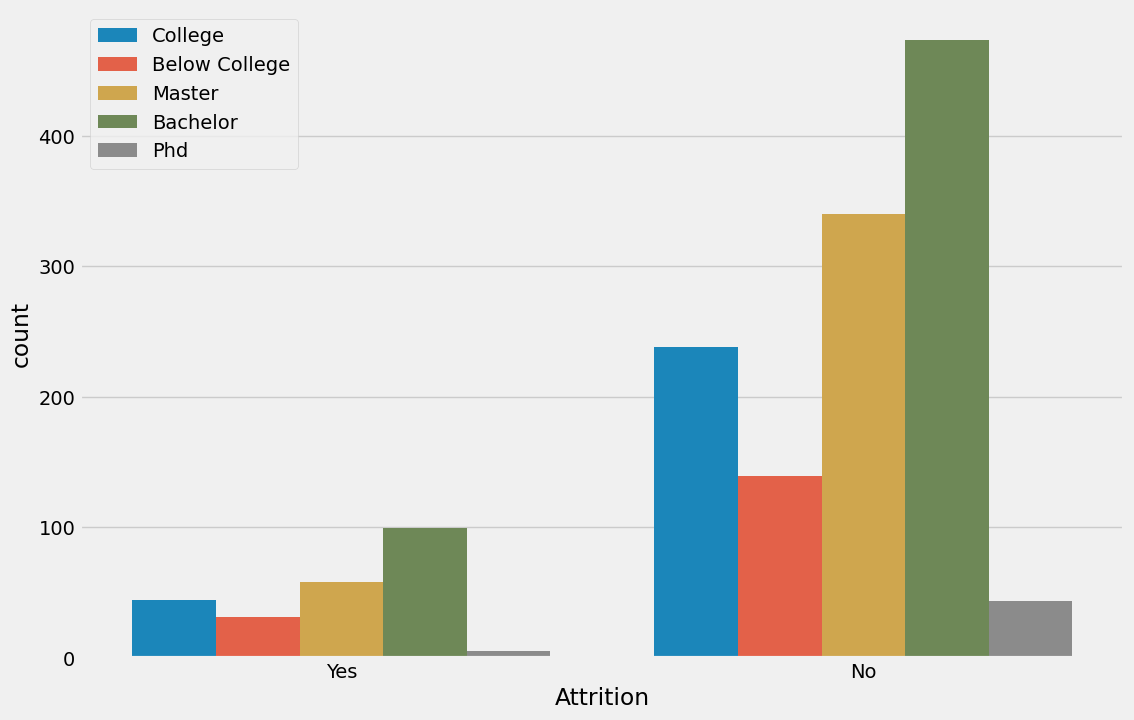

Attrition,No,Yes
Education,,
Below College,0.817647,0.182353
College,0.843972,0.156028
Bachelor,0.826923,0.173077
Master,0.854271,0.145729
Phd,0.895833,0.104167


In [65]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Attrition', hue='Education', data=data_df)
plt.legend(loc='best')
plt.show()
pd.crosstab(data_df.Education, 
            data_df.Attrition, 
            normalize='index').reindex(index=['Below College', 'College', 'Bachelor', 'Master', 'Phd'])

In [66]:
_tmp_phd = data_df[data_df.Education == 'Phd']

pd.crosstab([_tmp_phd.Department, _tmp_phd.JobRole], 
            _tmp_phd.Attrition, margins=True)

Attrition                                         No  Yes  All
Department             JobRole                                
Human Resources        Human Resources             2    1    3
Research & Development Healthcare Representative   3    0    3
                       Laboratory Technician       5    0    5
                       Manager                     2    0    2
                       Manufacturing Director      3    2    5
                       Research Director           7    0    7
                       Research Scientist          7    1    8
Sales                  Manager                     3    0    3
                       Sales Executive            11    1   12
All                                               43    5   48

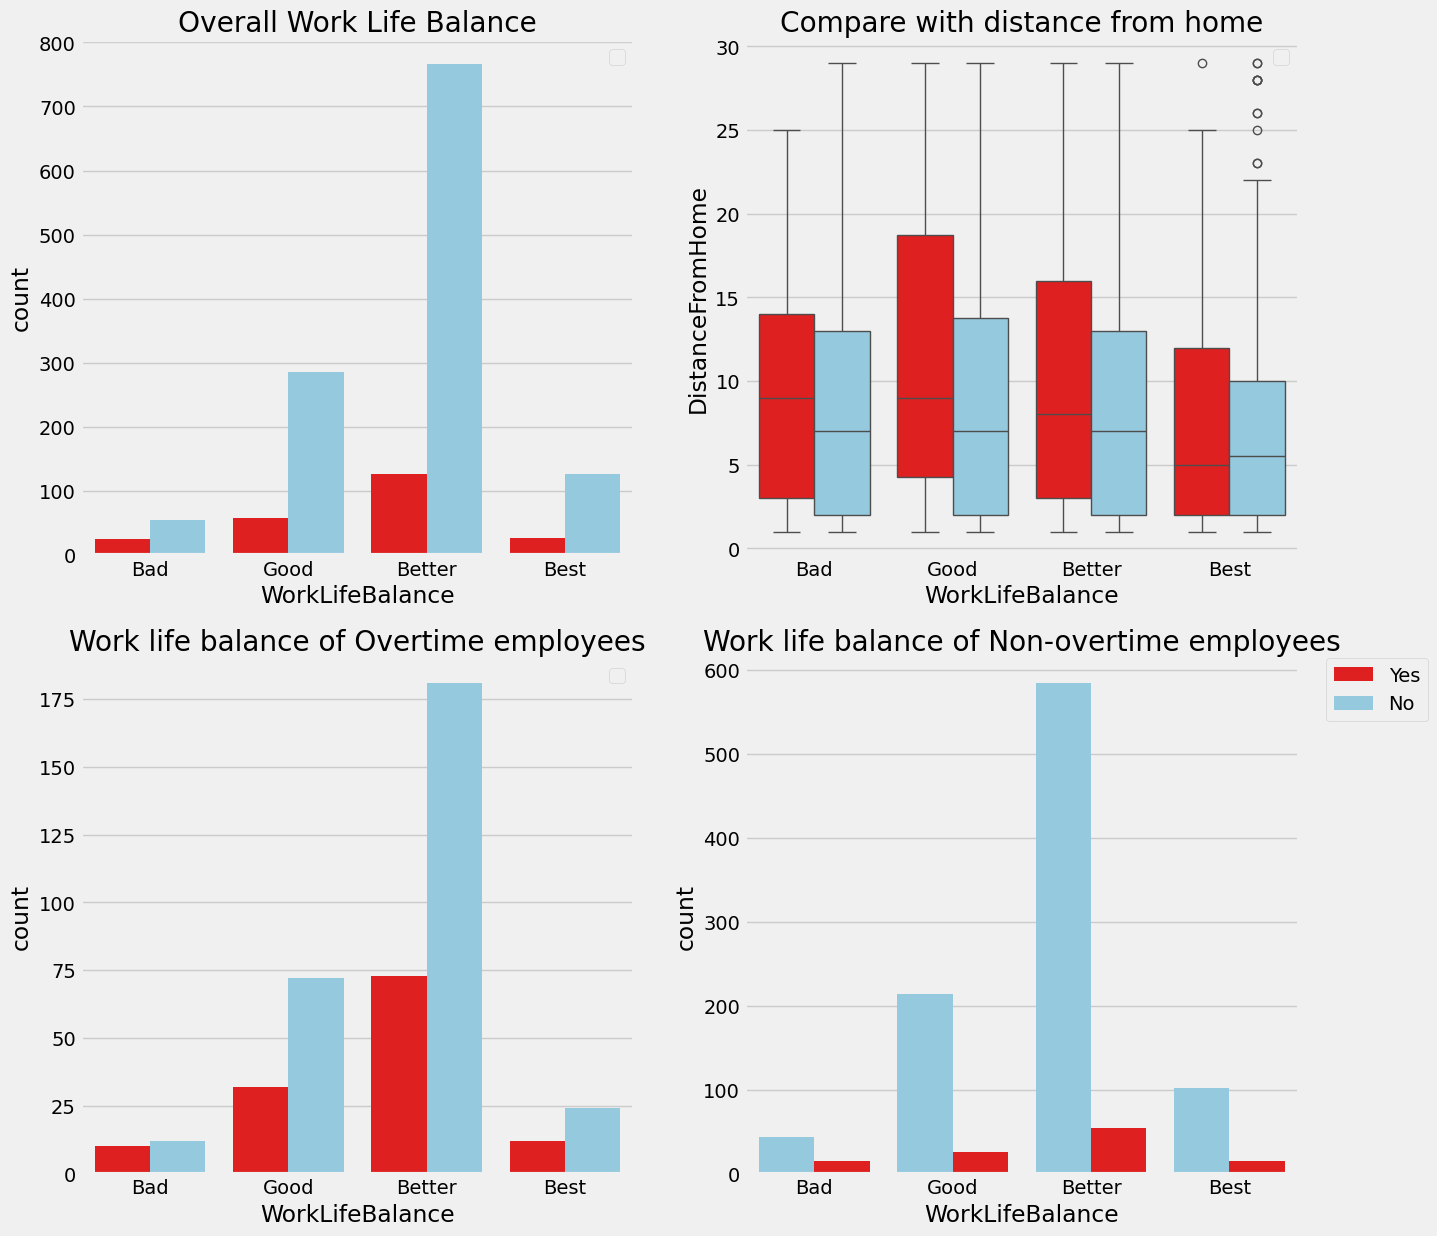

In [67]:
_tmp_order = ['Bad', 'Good', 'Better', 'Best']

f, axes = plt.subplots(2, 2, figsize=(14, 14))
sns.countplot(x='WorkLifeBalance', hue='Attrition', palette={'Yes': 'r', 'No': 'skyblue'},
              data=data_df, order=_tmp_order, ax=axes[0][0])
axes[0][0].set_title('Overall Work Life Balance')
sns.boxplot(x='WorkLifeBalance', y='DistanceFromHome', hue='Attrition', 
            palette={'Yes': 'r', 'No': 'skyblue'},
            data=data_df, order=_tmp_order, ax=axes[0][1])
axes[0][1].set_title('Compare with distance from home')
sns.countplot(x='WorkLifeBalance', hue='Attrition', palette={'Yes': 'r', 'No': 'skyblue'},
              data=data_df[data_df.OverTime == 'Yes'],
              order=_tmp_order, ax=axes[1][0])
axes[1][0].set_title('Work life balance of Overtime employees')
sns.countplot(x='WorkLifeBalance', hue='Attrition', palette={'Yes': 'r', 'No': 'skyblue'},
              data=data_df[data_df.OverTime != 'Yes'],
              order=_tmp_order, ax=axes[1][1])
axes[1][1].set_title('Work life balance of Non-overtime employees')
handles, labels = axes[0][0].get_legend_handles_labels()
axes[0, 0].legend(handles[:0], labels[:0])
axes[0, 1].legend(handles[:0], labels[:0])
axes[1, 0].legend(handles[:0], labels[:0])
axes[1, 1].legend(handles[:0], labels[:0])
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

In [68]:
X = data_df.loc[:, data_df.columns != 'Attrition']
y = data_df.loc[:, 'Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=SEED)
print("Training data set shape: %s\nTesting data set shape: %s" % (X_train.shape, X_test.shape))

Training data set shape: (1176, 30)
Testing data set shape: (294, 30)


In [69]:
X = data_df.loc[:, data_df.columns != 'Attrition']
y = data_df.loc[:, 'Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=SEED)
print("Training data set shape: %s\nTesting data set shape: %s" % (X_train.shape, X_test.shape))

Training data set shape: (1176, 30)
Testing data set shape: (294, 30)


In [70]:
print(data_df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [71]:
target_map = {'Yes': 1, 'No': 0}
y_train = y_train.apply(lambda x: target_map[x])
y_test = y_test.apply(lambda x: target_map[x])

In [72]:
print('Distribution of training:\n%s' % y_train.value_counts())
print('\n')
print('Distribution of testing:\n%s' % y_test.value_counts())

Distribution of training:
Attrition
0    986
1    190
Name: count, dtype: int64


Distribution of testing:
Attrition
0    247
1     47
Name: count, dtype: int64


In [73]:
def create_generation_feature(age_val: int) -> str:
    """
    Function to convert age value onto generation string
    @Args:
      age_val (int): the age value from data frame
      
    Return:
      String output specifies the generation 
    """
    out = ''
    if age_val < 37:
        out = 'Millenials'
        
    elif age_val < 54:
        out = 'Generation X'
        
    elif age_val < 73:
        out = 'Boomers'
        
    else:
        out = 'Silent'
        
    return out


def create_job_hop_index(df: pd.DataFrame, total_exp_col: str, 
                         num_prev_com_col: str) -> (int, float):
    """
    Function to compute the job hopper index and identify the first job or not
    @Args:
      df (pd.DataFrame): pandas data frame
      total_exp_col (str): the name of the column containing total experience
      num_prev_com_col (str): the name of the column containing numbers of previous companies worked
    
    Return:
      The job hopper index
    """
    first_job_ind = np.where(df[num_prev_com_col] == 0, 1, 0)
    job_hop_idx = np.where(df[num_prev_com_col] == 0, 
                           0.,
                           df[total_exp_col] / df[num_prev_com_col]
                          )
    
    return first_job_ind, job_hop_idx

In [74]:
_LOOKUP_COL = ['Department', 'JobRole', 'JobLevel']
_MEDIAN_INCOME_LOOKUP = data_df.groupby(_LOOKUP_COL). \
    agg({'MonthlyIncome': np.median, 'Age': 'count'}).reset_index(drop=False). \
    rename(columns={'MonthlyIncome': 'MedianIncome', 'Age': 'Count'})

In [75]:
def compute_compa_ratio_feature(df: pd.DataFrame, salary_col: str,
                                lookup_df: pd.DataFrame=_MEDIAN_INCOME_LOOKUP, 
                                col_lookup_list: list=_LOOKUP_COL):
    """
    Function to compute the compa-ratio of each employee.
      This is computed by each employee divided by the median salary of the industry
    @Args:
      df: pandas data frame with monthly salary of each employee
      salary_col: a name of pandas data frame storing income
      lookup_df: pandas data frame stored the median of salary
      col_lookup_list: A list of column names
      
    Return:
      pandas data frame
    """
    merge_df = df.reset_index().merge(_MEDIAN_INCOME_LOOKUP, 
                                      on=_LOOKUP_COL,
                                      how="left").set_index('index')
    merge_df['compa_ratio'] = merge_df[salary_col] / merge_df['MedianIncome']
    merge_df.drop(['MedianIncome', 'Count'], axis=1, inplace=True)
    return merge_df

In [76]:
# Train data
X_train['Generation'] = X_train.Age.apply(lambda x: create_generation_feature(x))
X_train['First_job_ind'], X_train['Job_hop_idx'] = create_job_hop_index(X_train, 
                                                                        'TotalWorkingYears',
                                                                        'NumCompaniesWorked'
                                                                       )
X_train = compute_compa_ratio_feature(X_train, 'MonthlyIncome')
X_train.drop(['Age', 'TotalWorkingYears', 'NumCompaniesWorked'], axis=1, inplace=True)

# Test datada
X_test['Generation'] = X_test.Age.apply(lambda x: create_generation_feature(x))
X_test['First_job_ind'], X_test['Job_hop_idx'] = create_job_hop_index(X_test, 
                                                                      'TotalWorkingYears',
                                                                      'NumCompaniesWorked'
                                                                     )
X_test = compute_compa_ratio_feature(X_test, 'MonthlyIncome')
X_test.drop(['Age', 'TotalWorkingYears', 'NumCompaniesWorked'], axis=1, inplace=True)

In [78]:
obj_val_col = []
le_10_val_col = []
mt_10_val_col = []
for col in X_train.columns:
    if (len(X_train[col].unique()) <= 10) & (X_train[col].dtypes == 'int64'):
        le_10_val_col.append(col)
    elif (len(X_train[col].unique()) > 10) & (X_train[col].dtypes == 'int64'):
        mt_10_val_col.append(col)
    elif X_train[col].dtypes == 'O':
        obj_val_col.append(col)

print('The object columns:\n%s' % obj_val_col)
print('\n\n')
num_val_col = X_train.columns.difference(obj_val_col)
print('The numerical columns:\n%s' % num_val_col)

The object columns:
['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Generation']



The numerical columns:
Index(['DailyRate', 'DistanceFromHome', 'First_job_ind', 'HourlyRate',
       'JobLevel', 'Job_hop_idx', 'MonthlyIncome', 'MonthlyRate',
       'PercentSalaryHike', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'compa_ratio'],
      dtype='object')


In [79]:
def encoding_feature(df, 
                     object_col_list: list=obj_val_col, numeric_col_list: list=num_val_col,
                     sample_ind: bool=False):
    """
    Function to do one-hot encoding for all categorical features and produce data frame for modeling
    @Args:
      df: predictors panda data frame
      object_col_list: the list containing the name of object columns
      numeric_col_list: the list containing the name of numeric columns
      sample_ind: the boolean to display sample head records; default is False
      
    Return:
      final predictor pandas data frame
    """
    categorical_df = pd.DataFrame()
    for i in object_col_list:
        tmp_ = pd.get_dummies(data=df.loc[:, i], 
                              columns=i,
                              prefix=i,
                              drop_first=True
                             )
        categorical_df = pd.concat([categorical_df, tmp_], axis=1)
    
    out_df = pd.concat([df.loc[:, numeric_col_list], categorical_df], axis=1)
    if sample_ind:
        display(out_df.head(5))
        
    return out_df

X_train = encoding_feature(X_train, sample_ind=True)
X_test = encoding_feature(X_test, sample_ind=True)

,DailyRate,DistanceFromHome,First_job_ind,HourlyRate,JobLevel,Job_hop_idx,MonthlyIncome,MonthlyRate,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,compa_ratio,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below College,Education_College,Education_Master,Education_Phd,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,Gender_Male,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,Generation_Generation X,Generation_Millenials
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
630,1230,1,0,33,2,0.666667,4775,19146,22,2,2,2,2,2,2,0.904356,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True
1221,1238,1,0,74,3,8.333333,10748,3395,23,1,3,23,15,14,4,1.090725,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False
122,441,14,0,72,1,0.777778,4963,4510,18,3,2,5,4,4,3,1.842242,False,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False
706,1479,24,0,100,4,5.500000,13194,17071,16,0,2,1,0,0,0,0.994086,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,True,True,False
87,432,9,0,96,1,3.333333,2075,18725,23,2,4,4,2,0,3,0.770946,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,True,False,True,False


,DailyRate,DistanceFromHome,First_job_ind,HourlyRate,JobLevel,Job_hop_idx,MonthlyIncome,MonthlyRate,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,compa_ratio,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below College,Education_College,Education_Master,Education_Phd,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,Gender_Male,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,Generation_Generation X,Generation_Millenials
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
520,817,2,0,56,2,4.000000,8120,18597,12,0,3,2,2,2,2,1.488816,False,True,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,True,False,True,False
286,920,24,0,43,1,6.333333,3161,19920,22,1,0,1,0,0,0,1.174438,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True,False
347,1309,4,0,99,2,1.666667,2976,25751,19,0,3,0,0,0,0,0.840678,True,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False
1245,897,10,1,59,1,0.000000,2145,2097,14,1,2,2,2,2,1,0.795623,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,True
1153,544,3,0,70,1,0.000000,1569,18420,12,0,2,0,0,0,0,0.614571,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False,True,False,False,False,True


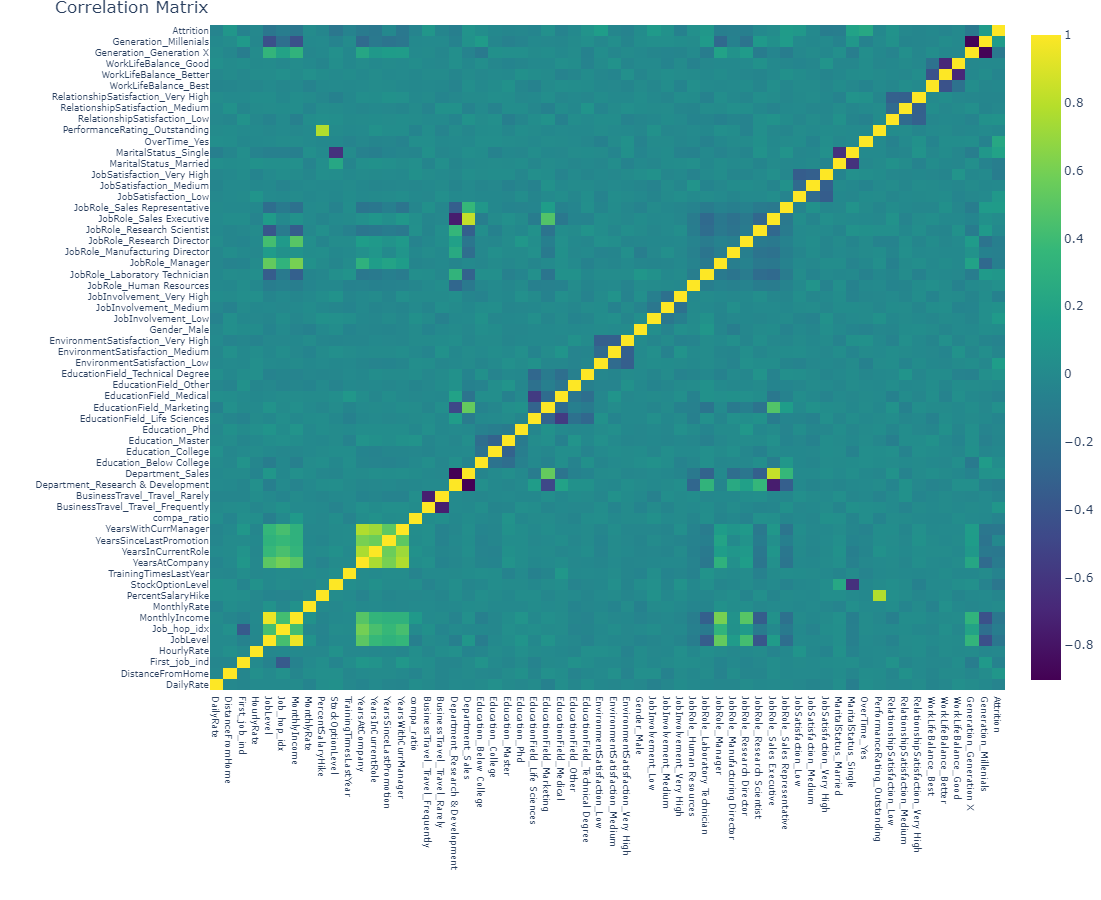

In [80]:
def plot_correlation_matrix(predictor_df: pd.DataFrame, target_label: pd.Series):
    corr = pd.concat([predictor_df, target_label], axis=1).corr()
    matrix_cols = corr.columns.tolist()
    corr_array = np.array(corr)
    trace = go.Heatmap(x=matrix_cols,
                       y=matrix_cols,
                       z=corr_array,
                       colorscale='Viridis',
                       colorbar=dict()
                      )
    
    layout = go.Layout(dict(title='Correlation Matrix',
                            autosize=False,
                            height=900,
                            width=900,
                            margin=dict(r=0, l=210,
                                        t=25, b=210
                                       ),
                            xaxis=dict(tickfont=dict(size=9)),
                            yaxis=dict(tickfont=dict(size=9))
                           )
                      )
    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)
    
    
plot_correlation_matrix(X_train, y_train)

In [83]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_(df: pd.DataFrame, 
                   thresh: float=5.0, print_remain_ind: bool=False):
    variables = list(range(df.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(df.iloc[:, variables].values, ix)
               for ix in range(df.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            del variables[maxloc]
            dropped = True

    remain_cols = df.columns[variables]
    if print_remain_ind:
        print('Remaining variables:\n%s' % remain_cols)
    
    return remain_cols

# Example usage with X_train assuming it's a DataFrame
# Replace X_train with your actual DataFrame

# Ensure X_train is a DataFrame and numeric (handle non-numeric columns appropriately)
# For example, if X_train includes non-numeric columns, exclude them:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_cols]

# Calculate VIF and print remaining columns
vif_cols_ = calculate_vif_(X_train_numeric, thresh=7., print_remain_ind=True)


Remaining variables:
Index(['DailyRate', 'DistanceFromHome', 'First_job_ind', 'Job_hop_idx',
       'MonthlyIncome', 'MonthlyRate', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [86]:
import pandas as pd
import numpy as np

def get_remain_columns_using_corr(predictors_df: pd.DataFrame,
                                  thresh: float=0.8):
    """
    Function to provide the column list which excludes highly correlated variables
    """
    # Calculate absolute correlation matrix
    corr_matrix = predictors_df.corr().abs()
    
    # Create mask for upper triangle of correlation matrix
    upper_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    
    # Identify columns with correlations above the threshold
    to_drop_cols = [column for column in upper_matrix.columns if any(upper_matrix[column] > thresh)]
    print('There are %d columns to remove: %s' % (len(to_drop_cols), to_drop_cols))
    
    # Calculate remaining columns
    remain_cols = upper_matrix.columns.difference(to_drop_cols)
    print('\nRemaining columns: %s' % remain_cols)
    
    return remain_cols

# Example usage with X_train assuming it's a DataFrame
# Replace X_train with your actual DataFrame

# Ensure X_train is a DataFrame and numeric (handle non-numeric columns appropriately)
# For example, if X_train includes non-numeric columns, exclude them:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_cols]

# Get remaining columns after excluding highly correlated variables
corr_cols_ = get_remain_columns_using_corr(X_train_numeric, thresh=0.8)


There are 1 columns to remove: ['MonthlyIncome']

Remaining columns: Index(['DailyRate', 'DistanceFromHome', 'First_job_ind', 'HourlyRate',
       'JobLevel', 'Job_hop_idx', 'MonthlyRate', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'compa_ratio'],
      dtype='object')


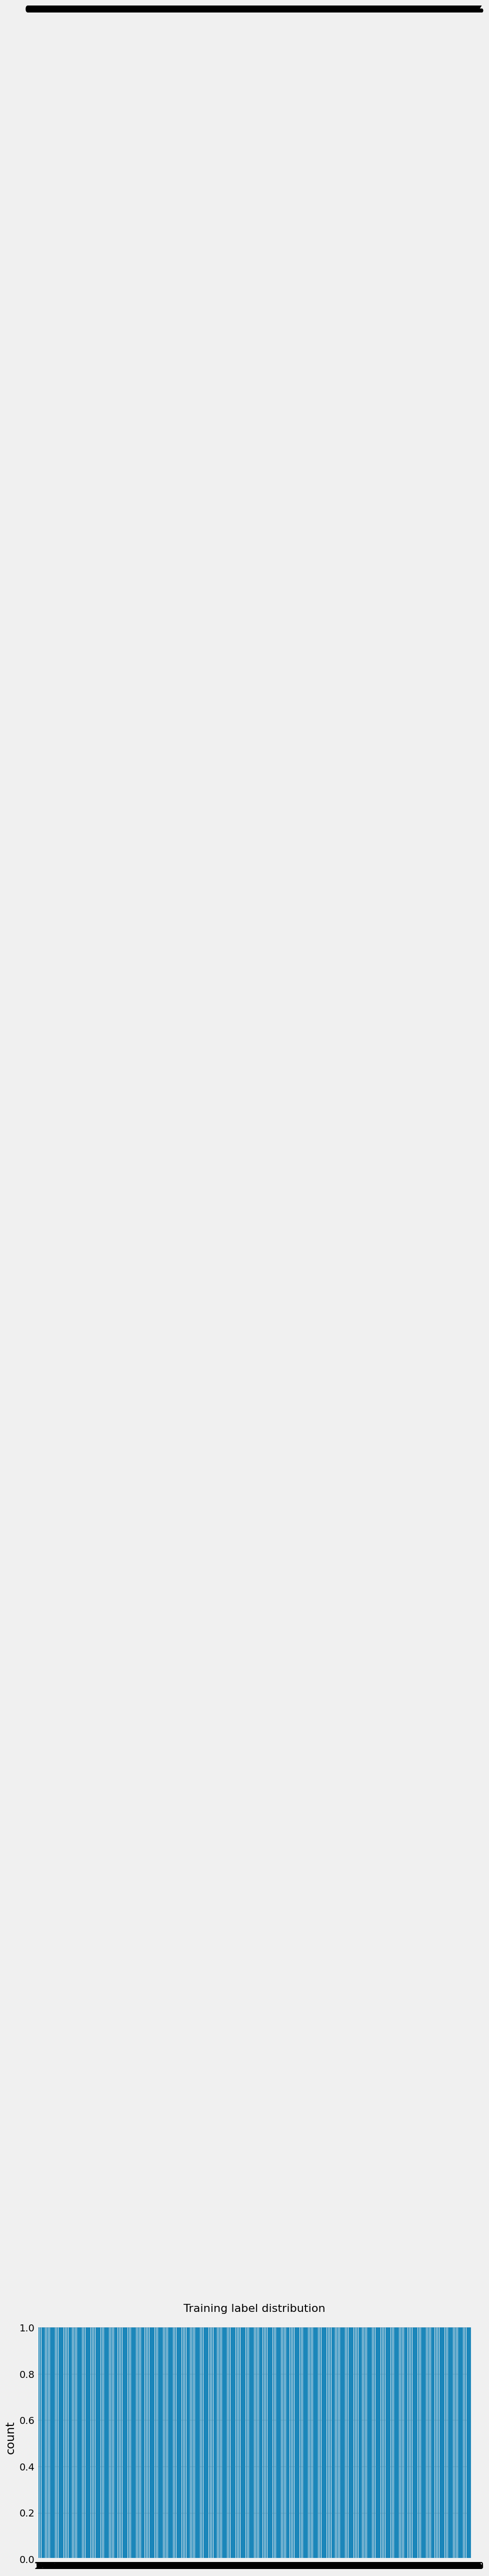

In [87]:
plt.figure(figsize=(10, 6))
total_ = float(len(y_train))
ax = sns.countplot(y_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 10,
            '{0:1.1%}'.format(height / total_),
            ha='center')
plt.title('Training label distribution', fontsize=16)
plt.show();

In [88]:
X_train_vif = X_train.loc[:, vif_cols_]
X_train_cor = X_train.loc[:, corr_cols_]
X_test_vif = X_test.loc[:, vif_cols_]
X_test_cor = X_test.loc[:, corr_cols_]

In [99]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import os

# Assuming you have already defined SEED, X_train, y_train
# Create and fit the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=SEED, max_depth=3)
tree_clf.fit(X_train, y_train)  # Ensure the model is fitted with training data

# Export and render the tree
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['No', 'Yes'],  
                           filled=True, rounded=True,  
                           special_characters=True)

# Specify the path where you want to save the rendered tree image
output_path = r'C:\Users\user\Downloads\model_decision_tree_employee_attrition'

# Render the tree
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render(output_path, view=False)

# Optionally, you can also view the tree in Jupyter Notebook using:
# graph.view()

# Print confirmation message
print(f"Decision tree visualization saved at: {output_path}.png")


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [103]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import os

# Assuming you have already defined SEED, X_train, y_train
# Create and fit the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=SEED, max_depth=3)
tree_clf.fit(X_train, y_train)  # Ensure the model is fitted with training data

# Export and render the tree
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['No', 'Yes'],  
                           filled=True, rounded=True,  
                           special_characters=True)

# Specify the path where you want to save the rendered tree image
output_path =  'C:\Program Files\Graphviz\bin'

# Render the tree
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render(output_path, view=False)

# Optionally, you can also view the tree in Jupyter Notebook using:
# graph.view()

# Print confirmation message
print(f"Decision tree visualization saved at: {output_path}.png")


OSError: [Errno 22] Invalid argument: 'C:\\Program Files\\Graphviz\x08in'

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example data
data = pd.read_csv(r'C:\Users\user\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv')  # Replace with your dataset path
X = data.drop(columns=['Attrition'])   # Assuming 'Attrition' is the target variable
y = data['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Perform one-hot encoding on categorical variables
X_train_encoded = pd.get_dummies(X_train)  # Convert categorical variables into dummy variables
X_test_encoded = pd.get_dummies(X_test)    # Do the same for test set

# Define and train your model (RandomForestClassifier in this example)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf_clf.fit(X_train_encoded, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8673469387755102


In [105]:
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgboost.XGBClassifier(random_state=SEED, n_jobs=-1)
params = {'n_estimators': [50, 100, 200, 300],
          'learning_rate': [0.01, 0.05, 0.1, 0.15],
          'min_child_weight': [1, 2, 3, 5, 10],
          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 1],
          'subsample': [0.6, 0.7, 0.8],
          'colsample_bytree': [0.6, 0.7, 0.8],
          'max_depth': [3, 4, 5],
         }
folds = 5
param_comb = 800
random_search = RandomizedSearchCV(xgb_clf, param_distributions=params, 
                                   n_iter=param_comb, scoring='f1', 
                                   n_jobs=-1, cv=folds, verbose=3, random_state=SEED)

random_search.fit(X_train, y_train)
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits

 All results:
{'mean_fit_time': array([3.2496305 , 0.14654493, 0.35184484, 0.16972113, 0.3726449 ,
       0.2662673 , 0.41628814, 0.14808002, 0.27292337, 0.34044256,
       0.24684358, 0.30467138, 0.18730383, 0.30766611, 0.11496372,
       0.09348879, 0.16206861, 0.25869985, 0.20255342, 0.32395883,
       0.12728019, 0.31617155, 0.19743948, 0.31564336, 0.36496639,
       0.11708632, 0.43962345, 0.29999728, 0.28942518, 0.40252266,
       0.15717974, 0.1017334 , 0.10113416, 0.09913516, 0.1630713 ,
       0.12606139, 0.23598161, 0.41453462, 0.41587291, 0.1857583 ,
       0.18444724, 0.13934865, 0.20625939, 0.25231228, 0.26967139,
       0.2102531 , 0.29790525, 0.16039033, 0.20019403, 0.17944555,
       0.51287913, 0.48049102, 0.35556655, 0.29592528, 0.18996043,
       0.20685868, 0.22620029, 0.42288756, 0.30937238, 0.32113943,
       0.31368208, 0.11909246, 0.19273324, 0.20300722, 0.50806155,
       0.30095716, 0.18687611, 0

In [125]:
print(data_df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [126]:
# Assuming you have already preprocessed X_train and X_test with the same ColumnTransformer
# Print the columns after preprocessing to check if 'Over18' is included
print(X_train.columns)
print(X_test.columns)


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'Performanc

In [167]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Define the preprocessing for numerical and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=SEED))
])

# Define the parameter grid for GridSearchCV
cv_params = {
    'classifier__C': [0.001, 0.01, 0.1, 1., 10., 100.], 
    'classifier__penalty': ['l2'],  # 'lbfgs' solver does not support 'l1'
    'classifier__class_weight': [None, 'balanced']
}

# Perform grid search
log_cv_1 = GridSearchCV(pipeline, cv_params, scoring='f1', cv=5)
log_cv_1.fit(X_train, y_train)

# Extract the best model
log_clf_all = log_cv_1.best_estimator_

# Make predictions on the test data
y_pred = log_clf_all.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred, pos_label='Yes')
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Get the coefficients from the model
model = log_clf_all.named_steps['classifier']
coefficients = model.coef_

# Map the coefficients to their feature names
feature_names = list(numeric_features) + \
                list(log_clf_all.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))

coefficients_df = pd.DataFrame(coefficients, columns=feature_names)
print("Model Coefficients:")
print(coefficients_df)


F1 Score: 0.0
Confusion Matrix:
[[247   0]
 [ 47   0]]
Classification Report:
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       247
         Yes       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

Model Coefficients:
        Age  DailyRate  DistanceFromHome  HourlyRate  JobLevel  MonthlyIncome  \
0 -0.043333  -0.015437          0.035544   -0.005759 -0.040778      -0.039259   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
0     0.003148            0.022342          -0.010218         -0.052598   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0          -0.039458              -0.017149       -0.025092   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0           -0.038791                 0.011028             -0.

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define parameters for grid search
cv_params = {
    'C': [0.001, 0.01, 0.1, 1., 10., 100.],
    'penalty': ['l2', None],  # Adjusted to include only 'l2' or None
    'class_weight': [None, 'balanced']
}



# Fixed parameters
fix_params = {'random_state': SEED}

# Perform Grid Search with cross-validation
log_cv_2 = GridSearchCV(LogisticRegression(**fix_params), cv_params, scoring='f1', cv=5)
log_cv_2.fit(X_train_vif, y_train)

# Get the best parameters and instantiate the best model
best_params = log_cv_2.best_params_
log_clf_vif = LogisticRegression(**{**fix_params, **best_params})

# Fit the best model on the training data
log_clf_vif.fit(X_train_vif, y_train)

# Make predictions
y_train_pred = log_clf_vif.predict(X_train_vif)
y_test_pred = log_clf_vif.predict(X_test_vif)

# Print classification report or other evaluation metrics
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Evaluation:")
print(classification_report(y_test, y_test_pred))


Training Set Evaluation:
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       986
         Yes       0.00      0.00      0.00       190

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.70      0.84      0.76      1176


Test Set Evaluation:
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       247
         Yes       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Step 1: Define the parameter grid
cv_params = {
    'C': [0.001, 0.01, 0.1, 1., 10., 100.],
    'penalty': ['l2', None],  # Adjusted to include only 'l2' or None for lbfgs solver
    'class_weight': [None, 'balanced']
}

fix_params = {
    'random_state': SEED
}

# Step 2: Perform GridSearchCV
log_cv_3 = GridSearchCV(LogisticRegression(**fix_params, solver='lbfgs'), cv_params, scoring='f1', cv=5)
log_cv_3.fit(X_train_cor, y_train)

# Step 3: Create Logistic Regression model with best parameters
best_log_params = log_cv_3.best_params_
log_clf3 = LogisticRegression(**fix_params, **best_log_params, solver='lbfgs')

# Step 4: Fit the model and evaluate predictions
log_clf3.fit(X_train_cor, y_train)

# Predictions
y_train_pred = log_clf3.predict(X_train_cor)
y_test_pred = log_clf3.predict(X_test_cor)

# Evaluation
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Classification Report:
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       986
         Yes       0.00      0.00      0.00       190

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.70      0.84      0.76      1176


Test Classification Report:
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       247
         Yes       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



In [170]:
import pandas as pd
import numpy as np

# Get the predicted probabilities
y_pred_proba = log_clf_all.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (assuming 'Yes')

# Create a DataFrame with the actual and predicted values
decile_df = pd.DataFrame({
    'actual': y_test,
    'predicted_proba': y_pred_proba
})

# Sort the DataFrame by predicted probabilities
decile_df = decile_df.sort_values(by='predicted_proba', ascending=False)

# Split the DataFrame into deciles
decile_df['decile'] = pd.qcut(decile_df['predicted_proba'], 10, labels=False)

# Calculate the mean predicted probability and actual event rate for each decile
decile_analysis = decile_df.groupby('decile').agg(
    mean_predicted_proba=('predicted_proba', 'mean'),
    actual_event_rate=('actual', lambda x: (x == 'Yes').mean())
).reset_index()

# Print the decile analysis
print("Decile Analysis:")
print(decile_analysis)


Decile Analysis:
   decile  mean_predicted_proba  actual_event_rate
0       0              0.107328           0.033333
1       1              0.129149           0.000000
2       2              0.140787           0.137931
3       3              0.151332           0.033333
4       4              0.159492           0.103448
5       5              0.165722           0.000000
6       6              0.174445           0.100000
7       7              0.183383           0.206897
8       8              0.191446           0.344828
9       9              0.210125           0.633333


In [175]:
import pandas as pd
import numpy as np

# Define a function to generate prediction bands
def gen_pred_band(prob, n_bands=10):
    """
    Generate prediction bands.
    Args:
        prob (float): The probability value.
        n_bands (int): Number of bands to divide the probabilities.
    Returns:
        str: The prediction band label.
    """
    band = int(prob * n_bands)
    return f'Band_{band}'

# Get the predicted probabilities and classes
predict_proba = log_clf_all.predict_proba(X_test)
predict_classes = log_clf_all.predict(X_test)

# Create a DataFrame with the predicted probabilities, predicted classes, and actual classes
predict_df = pd.DataFrame(predict_proba, columns=['prob_class_0', 'prob_class_1'])
predict_df['pred_class'] = predict_classes
predict_df['actual_class'] = y_test.reset_index(drop=True)

# Apply the prediction band function to generate bands
predict_df['prob_class_1_band'] = predict_df.prob_class_1.apply(lambda x: gen_pred_band(x))

# Merge the prediction DataFrame with the original test DataFrame
merge_test_df = pd.concat([X_test.reset_index(drop=True), predict_df], axis=1)

# Generate the crosstab
crosstab = pd.crosstab(merge_test_df.prob_class_1_band, merge_test_df.actual_class)

# Display the crosstab
print(crosstab)


actual_class        No  Yes
prob_class_1_band          
Band_0               7    0
Band_1             235   30
Band_2               5   17


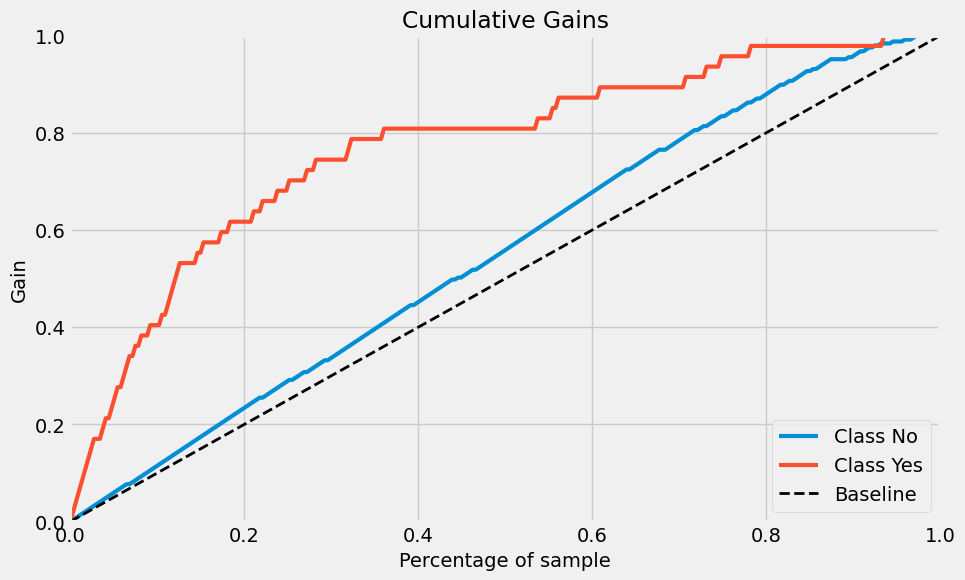

In [172]:
skplt.metrics.plot_cumulative_gain(y_test, log_clf_all.predict_proba(X_test),
                                   title='Cumulative Gains', figsize=(10, 6)
                                  )
plt.show();

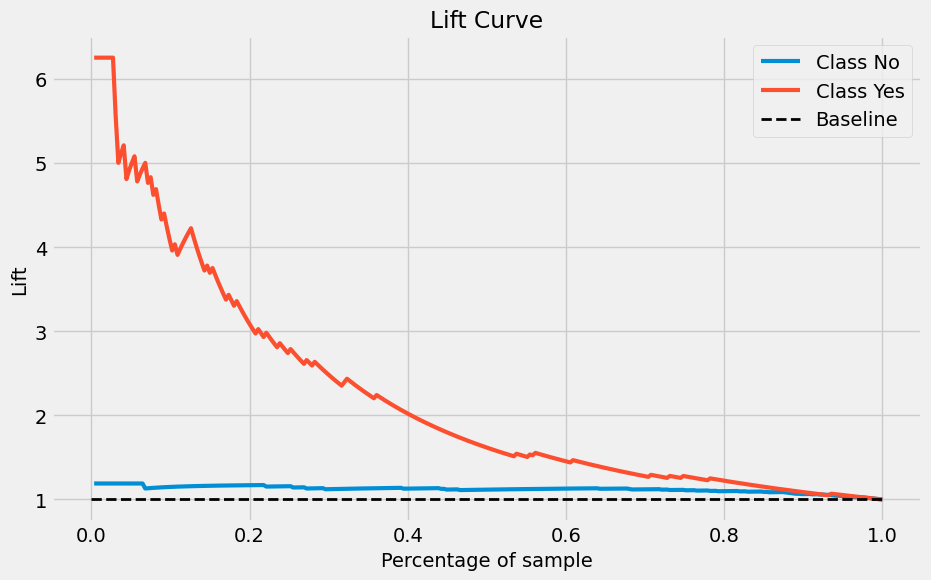

In [173]:
skplt.metrics.plot_lift_curve(y_test, log_clf_all.predict_proba(X_test), 
                              title='Lift Curve', figsize=(10, 6))
plt.legend(loc='best')
plt.show();

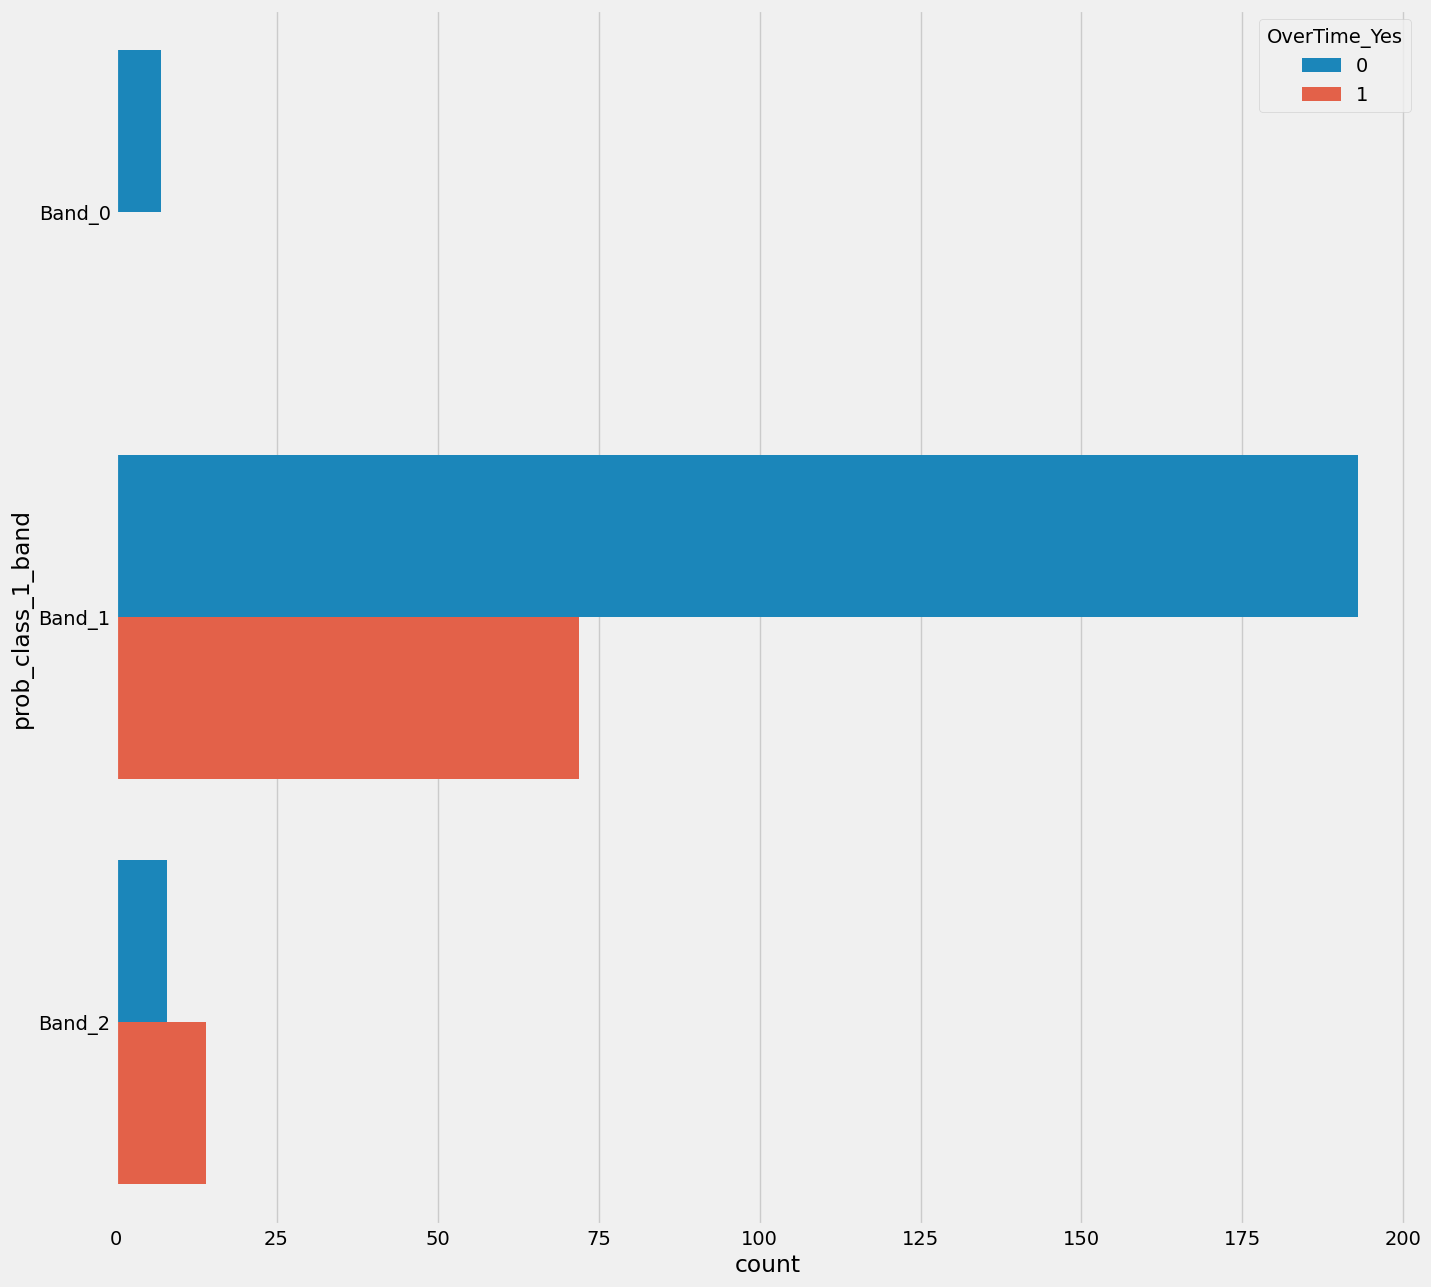

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample code to create the 'OverTime_Yes' column if it doesn't exist
# Assuming 'OverTime' column exists with values like 'Yes' and 'No'
if 'OverTime_Yes' not in merge_test_df.columns:
    merge_test_df['OverTime_Yes'] = (merge_test_df['OverTime'] == 'Yes').astype(int)

# Ensure the 'prob_class_1_band' column is treated as a categorical variable
merge_test_df['prob_class_1_band'] = pd.Categorical(
    merge_test_df['prob_class_1_band'],
    categories=sorted(merge_test_df['prob_class_1_band'].unique()),
    ordered=True
)

# Plotting
plt.figure(figsize=(15, 15))
sns.countplot(y='prob_class_1_band',
              hue='OverTime_Yes', 
              data=merge_test_df)
plt.show()
